In [53]:
import pandas as pd
import numpy as np
import math

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

In [14]:
!pip install geopandas matplotlib
import geopandas as gpd

In [15]:
plt.rcParams['figure.figsize'] = (20, 10)

In [24]:
geo_entrances = gpd.read_file('https://data.cityofnewyork.us/api/geospatial/drex-xx56?method=export&format=GeoJSON')

In [25]:
geo_entrances

,line,name,objectid,url,geometry
0,2-5,Birchall Ave & Sagamore St at NW corner,1734,http://web.mta.info/nyct/service/,POINT (-73.86835600032798 40.84916900104506)
1,2-5,Birchall Ave & Sagamore St at NE corner,1735,http://web.mta.info/nyct/service/,POINT (-73.86821300022677 40.84912800131844)
2,2-5,Morris Park Ave & 180th St at NW corner,1736,http://web.mta.info/nyct/service/,POINT (-73.87349900050798 40.84122300105249)
3,2-5,Morris Park Ave & 180th St at NW corner,1737,http://web.mta.info/nyct/service/,POINT (-73.87289199978331 40.84145300067447)
4,2-5,Boston Rd & 178th St at SW corner,1738,http://web.mta.info/nyct/service/,POINT (-73.87962300013866 40.84081500075867)
5,2-5,Boston Rd & E Tremont Ave at NW corner,1739,http://web.mta.info/nyct/service/,POINT (-73.88000500027815 40.84043400087587)
6,2-5,Boston Rd & E Tremont Ave at NE corner,1740,http://web.mta.info/nyct/service/,POINT (-73.87983300021861 40.84035400111976)
7,2-5,Boston Rd & 178th St at SE corner,1741,http://web.mta.info/nyct/service/,POINT (-73.8795549998336 40.84063900116436)
8,2-5,Boston Rd & 178th St at NW corner,1742,http://web.mta.info/nyct/service/,POINT (-73.87939700013239 40.84107800066419)
9,2-5,Boston Rd & 174th St at SW corner,1743,http://web.mta.info/nyct/service/,POINT (-73.88804799985908 40.83732500129732)


In [18]:
geo_entrances.dtypes

line        object
name        object
objectid    object
url         object
geometry    object
dtype: object

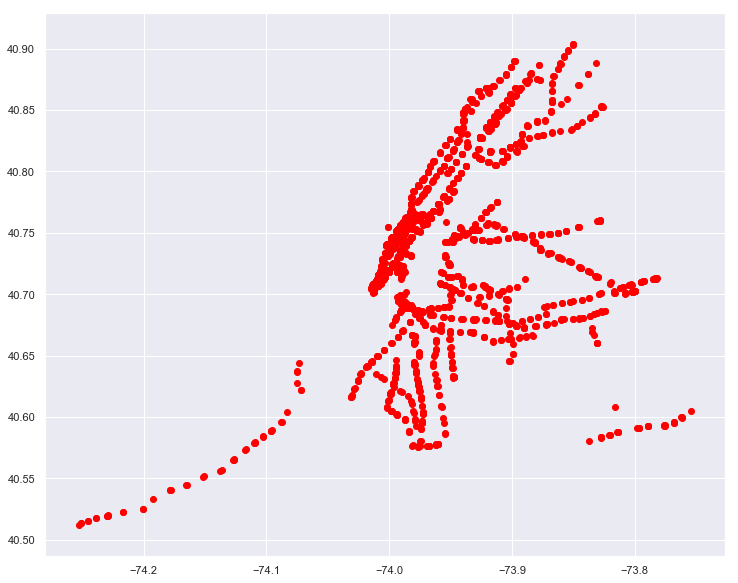

In [19]:
ax = geo_entrances.plot(color='red')

In [23]:
geo_stations = gpd.read_file('https://data.cityofnewyork.us/api/geospatial/arq3-7z49?method=export&format=GeoJSON')

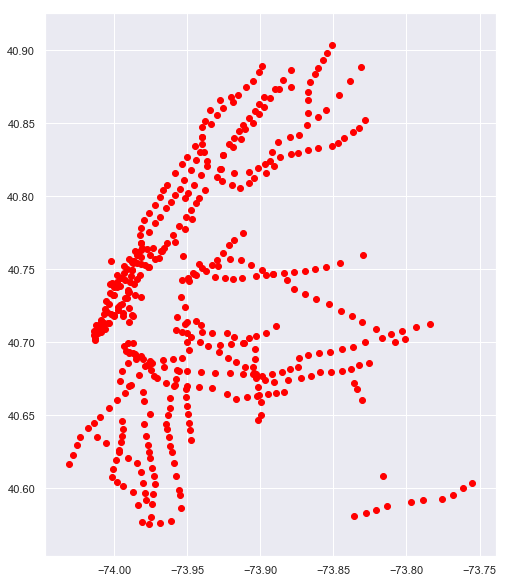

In [26]:
ax = geo_stations.plot(color='red')

In [36]:
stations_list = list(geo_stations.name)

In [47]:
print(stations_list)

['Astor Pl', 'Canal St', '50th St', 'Bergen St', 'Pennsylvania Ave', '238th St', 'Cathedral Pkwy (110th St)', 'Kingston - Throop Aves', '65th St', '36th St', 'Delancey St - Essex St', 'Van Siclen Ave', 'Norwood Ave', '104th-102nd Sts', 'DeKalb Ave', 'Beach 105th St', 'Beach 90th St', 'Freeman St', 'Intervale Ave', '182nd-183rd Sts', '174th-175th Sts', '167th St', 'Mets - Willets Point', 'Junction Blvd', 'Flushing - Main St', 'Buhre Ave', '3rd Ave - 138th St', 'Castle Hill Ave', 'Brooklyn Bridge - City Hall', 'Zerega Ave', 'Grand Central - 42nd St', '33rd St', '96th St', '77th St', 'Chauncey St', 'Union St', 'Elmhurst Ave', 'Ralph Ave', 'Pelham Pkwy', 'Gun Hill Rd', 'Nereid Ave (238 St)', 'Franklin Ave', 'Simpson St', 'Bronx Park East', 'Winthrop St', 'Van Siclen Ave', '149th St - Grand Concourse', '161st St - Yankee Stadium', 'Lexington Ave - 59th St', 'E 149th St', 'Morrison Av - Soundview', 'Whitlock Ave', 'St Lawrence Ave', 'Woodside - 61st St', 'Far Rockaway - Mott Ave', '72nd St',

In [49]:
test_stat = stations_list[(stations_list.name == '96th St')]

AttributeError: 'list' object has no attribute 'name'

In [55]:
stations_list.drop(index='Astor Pl', level=2)

AttributeError: 'list' object has no attribute 'drop'

In [56]:
set_1 = ('Astor Pl', 'Canal St', '50th St', 'Bergen St', 'Pennsylvania Ave', '238th St', 'Cathedral Pkwy (110th St)', 'Kingston - Throop Aves', '65th St', '36th St', 'Delancey St - Essex St', 'Van Siclen Ave', 'Norwood Ave', '104th-102nd Sts', 'DeKalb Ave', 'Beach 105th St', 'Beach 90th St', 'Freeman St', 'Intervale Ave', '182nd-183rd Sts', '174th-175th Sts', '167th St', 'Mets - Willets Point', 'Junction Blvd', 'Flushing - Main St', 'Buhre Ave', '3rd Ave - 138th St', 'Castle Hill Ave', 'Brooklyn Bridge - City Hall', 'Zerega Ave', 'Grand Central - 42nd St', '33rd St', '96th St', '77th St', 'Chauncey St', 'Union St', 'Elmhurst Ave', 'Ralph Ave', 'Pelham Pkwy', 'Gun Hill Rd', 'Nereid Ave (238 St)', 'Franklin Ave', 'Simpson St', 'Bronx Park East', 'Winthrop St', 'Van Siclen Ave', '149th St - Grand Concourse', '161st St - Yankee Stadium', 'Lexington Ave - 59th St', 'E 149th St', 'Morrison Av - Soundview', 'Whitlock Ave', 'St Lawrence Ave', 'Woodside - 61st St', 'Far Rockaway - Mott Ave', '72nd St', '96th St', '168th St', 'Kingsbridge Rd', '42nd St - Bryant Pk', 'Prospect Park', '55th St', 'Jamaica - Van Wyck', 'Kew Gardens - Union Tpke', 'Sutphin Blvd - Archer Av', 'Court Sq - 23rd St', '67th Ave', 'Grand Ave - Newtown', 'Ditmas Ave', 'Classon Ave', 'Broadway', 'Lorimer St', 'Sutter Ave', 'Wilson Ave', 'Halsey St', 'Lorimer St', '8th Ave', '36th Ave', 'Broadway', 'Times Sq - 42nd St', 'Grand Central - 42nd St', 'Park Pl', '111th St', 'W 4th St - Washington Sq (Lower)', '51st St', '86th St', '233rd St', '66th St - Lincoln Ctr', 'Hunts Point Ave', 'Canal St', 'Middletown Rd', '23rd St', 'Court Sq', '59th St - Columbus Circle', 'Hunters Point Ave', '23rd St', 'Houston St', '104th St', 'Broad Channel', 'Ocean Pkwy', 'Vernon Blvd - Jackson Ave', '68th St - Hunter College', 'Queensboro Plz', 'Rockaway Blvd', 'Union Sq - 14th St', 'Bedford - Nostrand Aves', '15th St - Prospect Park', '7th Ave', 'Ft Hamilton Pkwy', 'Church Ave', 'Beverly Rd', 'Church Ave', 'Newkirk Ave', 'Parkside Ave', 'Grand Army Plaza', "Atlantic Av - Barclay's Center", 'Rockaway Ave', 'Fulton St', 'Clinton - Washington Aves', '7th Ave', "Atlantic Av - Barclay's Center", "Atlantic Av - Barclay's Center", 'Borough Hall', 'Aqueduct Racetrack', 'Morris Park', 'Pelham Pkwy', 'Nostrand Ave', 'Nevins St', 'Eastern Pkwy - Bklyn Museum', 'Beverly Rd', 'Church Ave', 'Newkirk Ave', 'Brooklyn College - Flatbush Ave', 'Sterling St', 'Crown Hts - Utica Ave', 'Kingston Ave', 'Nassau Ave', 'Greenpoint Ave', 'Marcy Ave', 'Hewes St', '138th St - Grand Concourse', '5th Ave - 53rd St', 'Lexington Ave - 53rd St', '28th St', 'Herald Sq - 34th St', '1st Ave', 'Times Sq - 42nd St', 'Metropolitan Ave', 'Grand St', 'Graham Ave', 'Bedford Ave', 'Montrose Ave', 'Long Island City - Court Sq', '21st St', '39th Ave', '145th St', '157th St', '96th St', '103rd St', 'Central Park North (110th St)', '103rd St', '72nd St', '81st St', '75th Ave', '86th St', 'Cathedral Pkwy (110th St)', '116th St - Columbia University', '125th St', '135th St', '116th St', 'Tremont Ave', '137th St - City College', '145th St', '176th St', 'Burnside Ave', '170th St', '168th St', '181st St', '191st St', '175th St', 'Beach 44th St', 'Beach 60th St', 'Beach 98th St', 'Rockaway Park - Beach 116 St', 'Beach 36th St', 'Beach 25th St', 'Parsons Blvd', '169th St', '103rd St - Corona Plaza', '111th St', '63rd Dr - Rego Park', 'Grant Ave', '79th St', 'Atlantic Ave', 'Christopher St - Sheridan Sq', 'Ozone Park - Lefferts Blvd', 'Times Sq - 42nd St', 'W 8th St - NY Aquarium', '28th St', '28th St', 'Pelham Bay Park', 'Westchester Sq - E Tremont Ave', '18th St', 'Grand Central - 42nd St', 'Beach 67th St', 'W 4th St - Washington Sq (Upper)', '85th St - Forest Pky', 'Woodhaven Blvd', '111th St', '121st St', 'Halsey St', 'Myrtle - Wyckoff Aves', 'New Lots Ave', 'Van Siclen Ave', 'Cleveland St', 'Livonia Ave', 'Junius St', 'Rockaway Ave', 'Canarsie - Rockaway Pkwy', 'E 105th St', 'Saratoga Ave', 'Sutter Ave - Rutland Road', 'New Lots Ave', 'Broadway Junction', 'Alabama Ave', 'Shepherd Ave', 'Crescent St', 'Cypress Hills', '75th St - Eldert Ln', '69th St', '74th St - Broadway', 'Woodhaven Blvd - Queens Mall', 'Myrtle - Wyckoff Aves', 'Seneca Ave', 'DeKalb Ave', '52nd St', '46th St', 'Northern Blvd', '46th St', '82nd St - Jackson Hts', '90th St - Elmhurst Av', 'Howard Beach - JFK Airport', 'Aqueduct - North Conduit Av', 'Briarwood - Van Wyck Blvd', 'Forest Hills - 71st Av', 'Sutphin Blvd', 'Jamaica Ctr - Parsons / Archer', '225th St', 'Elder Ave', 'Longwood Ave', 'Astoria Blvd', 'Astoria - Ditmars Blvd', 'Jackson Ave', 'Prospect Ave', 'Cypress Ave', '174th St', 'Allerton Ave', "E 143rd St - St Mary's St", 'Kingsbridge Rd', 'Bedford Park Blvd - Lehman College', 'Harlem - 148 St', 'Mt Eden Ave', 'Fordham Rd', '170th St', 'Bedford Park Blvd', 'Marble Hill - 225th St', '231st St', '215th St', '207th St', 'Inwood - 207th St', 'Van Cortlandt Park - 242nd St', 'West Farms Sq - E Tremont Av', '219th St', 'Mosholu Pkwy', 'Norwood - 205th St', 'Burke Ave', 'Baychester Ave', 'Eastchester - Dyre Ave', 'Jamaica - 179th St', 'Wakefield - 241st St', 'Botanic Garden', 'Bushwick - Aberdeen', 'Broadway Junction', 'Gun Hill Rd', 'E 180th St', 'Dyckman St', '125th St', 'Franklin Ave - Fulton St', '149th St - Grand Concourse', '3rd Ave - 149th St', '167th St', 'Brook Ave', '33rd St', '40th St', '145th St', '155th St', '161st St - Yankee Stadium', 'Utica Ave', 'Steinway St', 'Kosciuszko St', 'Gates Ave', 'Central Ave', 'Knickerbocker Ave', '30th Ave', 'Jefferson St', 'Morgan Ave', 'Queens Plz', '18th Ave', '77th St', 'Bay Ridge Ave', '50th St', 'Ft Hamilton Pkwy', '25th Ave', 'Bay Pky', '20th Ave', '18th Ave', 'Bay Ridge - 95th St', '86th St', '79th St', '71st St', '20th Ave', '18th Ave', '62nd St', 'New Utrecht Ave', 'Ave U', 'Kings Hwy', 'Brighton Beach', 'Sheepshead Bay', 'Ave U', 'Kings Hwy', 'Ave U', 'Kings Hwy', 'Neptune Ave', 'Ave X', 'Bay 50th St', 'Gravesend - 86th St', 'Ave P', 'Ave N', 'Bay Pky', 'Ave M', 'Bay Pky', 'Ave I', 'Ave J', 'Ave H', 'Neck Rd', '21st St - Queensbridge', '50th St', '7th Ave', '47th-50th Sts - Rockefeller Ctr', '57th St', 'Lexington Ave - 63rd St', 'Roosevelt Island - Main St', '59th St - Columbus Circle', '49th St', '57th St', '5th Ave - 59th St', 'Lexington Ave - 59th St', '34th St - Penn Station', 'Times Sq - 42nd St', 'Fulton St', 'Chambers St', '42nd St - Port Authority Bus Term', 'Myrtle-Willoughby Aves', 'Flushing Ave', '23rd St', 'Herald Sq - 34th St', 'Hoyt - Schermerhorn Sts', 'Jay St - MetroTech', 'East Broadway', 'Delancey St - Essex St', 'Lower East Side - 2nd Ave', 'Flushing Ave', 'Myrtle Ave', '4th Av - 9th St', 'Smith - 9th Sts', 'Bergen St', 'Jay St - MetroTech', 'Court St', 'Union Sq - 14th St', '23rd St', 'Prospect Ave', '4th Av - 9th St', '3rd Ave', 'Union Sq - 14th St', 'Liberty Ave', 'Broadway Junction', '59th St', '45th St', '36th St', '9th Ave', '53rd St', 'Ft Hamilton Pkwy', '25th St', 'Carroll St', 'Spring St', '181st St', '190th St', '116th St', '125th St', 'Prince St', '8th St - NYU', 'Fulton St', 'Park Pl', 'Chambers St', 'Hoyt St', 'Borough Hall', '183rd St', 'Fordham Rd', 'World Trade Center', 'Canal St - Holland Tunnel', '155th St', '163rd St - Amsterdam Av', 'Fulton St', 'Chambers St', 'Canal St', 'City Hall', 'Canal St', 'South Ferry', 'Bowling Green', 'Wall St', 'Whitehall St', 'Rector St', 'Fresh Pond Rd', 'Middle Village - Metropolitan Ave', 'Rector St', 'Cortlandt St', 'Fulton St', 'Broad St', 'Cortlandt St', 'Wall St', 'Dyckman St', 'Grand St', 'Broadway - Lafayette St', 'Bowery', 'Canal St', '23rd St', '34th St - Penn Station', 'Jackson Hts - Roosevelt Av', '14th St', '135th St', '14th St', '6th Ave', '8th Ave', '14th St', 'Nostrand Ave', 'Clark St', 'Franklin Ave', 'Clinton - Washington Aves', 'Forest Ave', '110th St', '86th St', 'York St', 'High St', 'Lafayette Ave', 'President St', 'Woodlawn', 'Bleecker St', '103rd St', 'Euclid Ave', '88th St', 'Cortelyou Rd', '116th St', 'Parkchester', 'Franklin St', '80th St', '5th Ave - Bryant Pk', 'Spring St', '125th St', 'Coney Island - Stillwell Av', '34th St - Hudson Yards', '72nd St', '86th St', '96th St')

In [57]:
type(set_1)

tuple

In [63]:
set_2 = ('42 ST-PORT AUTH', '23 ST', '34 ST-HERALD SQ', 'CANAL ST', 'TIMES SQ-42 ST', 'CHAMBERS ST', 'FULTON ST', '104 ST', '72 ST', '14 ST', '125 ST', '34 ST-PENN STA', '59 ST', 'HIGH ST', '59 ST COLUMBUS', '3 AV-149 ST', 'LEXINGTON AV/53', '57 ST-7 AV', '183 ST', 'DEKALB AV')

In [64]:
type(set_2)

tuple